In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline
from math import sqrt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
births = pd.read_csv('Downloads/births.csv', date_parser=True)
births

,obsno,month_year,births
0,1,Jan-46,26.663
1,2,Feb-46,23.598
2,3,Mar-46,26.931
3,4,Apr-46,24.740
4,5,May-46,25.806
...,...,...,...
163,164,Aug-59,30.000
164,165,Sep-59,29.261
165,166,Oct-59,29.012
166,167,Nov-59,26.992


In [3]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   obsno       168 non-null    int64  
 1   month_year  168 non-null    object 
 2   births      168 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.1+ KB


In [4]:
births.head()

,obsno,month_year,births
0,1,Jan-46,26.663
1,2,Feb-46,23.598
2,3,Mar-46,26.931
3,4,Apr-46,24.740
4,5,May-46,25.806


In [5]:
#Indexing month_year
#2 digit year without century while converting 4 digit format, 
#python considers as present century so adjusting the year

In [6]:
births.index = pd.DatetimeIndex(births.month_year)+pd.DateOffset(years=-100)
births.info()
births.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1946-01-01 to 1959-12-01
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   obsno       168 non-null    int64  
 1   month_year  168 non-null    object 
 2   births      168 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.2+ KB


,obsno,month_year,births
month_year,,,
1946-01-01,1,Jan-46,26.663
1946-02-01,2,Feb-46,23.598
1946-03-01,3,Mar-46,26.931
1946-04-01,4,Apr-46,24.740
1946-05-01,5,May-46,25.806


In [7]:
#Removing unecessary variables

In [8]:
births = births.drop(['obsno','month_year'], axis=1)
births.info()
births.shape #168, 1
births.head() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1946-01-01 to 1959-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   births  168 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


,births
month_year,
1946-01-01,26.663
1946-02-01,23.598
1946-03-01,26.931
1946-04-01,24.740
1946-05-01,25.806


In [9]:
#Variable births

In [10]:
births.describe()

,births
count,168.000000
mean,25.059310
std,2.318791
min,20.000000
25%,23.280750
50%,24.957000
75%,26.878750
max,30.000000


Text(0.5, 1.0, 'Data = births')

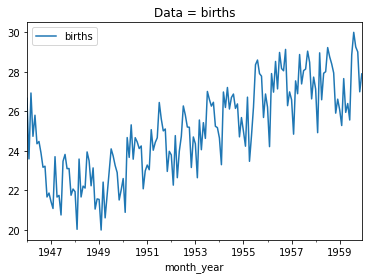

In [11]:
#Lineplot
births.plot()
plt.title('Data = births')

Text(0.5, 1.0, '4 Yrs Data = births')

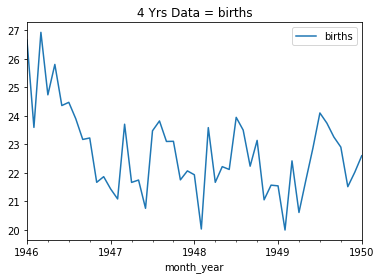

In [12]:
#Only 4years of data
births[:49].plot()
plt.title('4 Yrs Data = births')


Text(0.5, 1.0, 'Histogram of births Data')

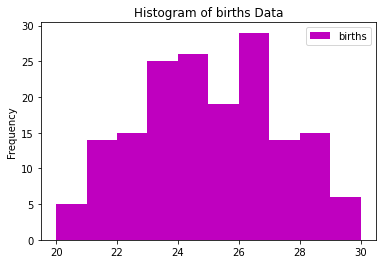

In [13]:
#Histogram
births.plot(kind='hist', color = 'm')
plt.title('Histogram of births Data')


Text(0.5, 1.0, 'Density plot of births Data')

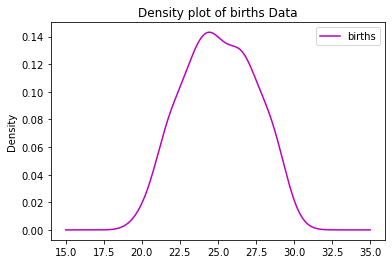

In [14]:
#Density plot
births.plot(kind='kde', color = 'm')
plt.title('Density plot of births Data')

Text(0.5, 1.0, 'Boxplot of births Data')

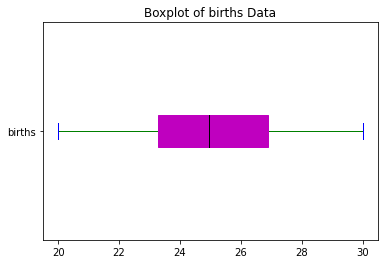

In [15]:
#Boxplot
props2  = dict(boxes = 'm', whiskers ='green', medians = 'black', caps = 'blue')
births.plot.box(color = props2 , patch_artist = True, vert = False)
plt.title('Boxplot of births Data')


In [16]:
#Decompose
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
# Season Decompose with Multiplicative model
births_dec_m = seasonal_decompose(births, model='multiplicative')


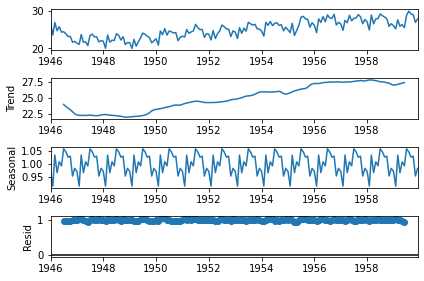

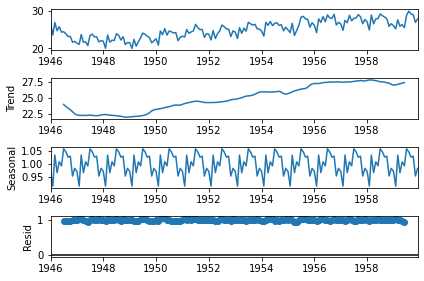

In [18]:
births_dec_m.plot() #Trend & Seasonality visible


In [19]:
births_dec_m.observed

month_year
1946-01-01    26.663
1946-02-01    23.598
1946-03-01    26.931
1946-04-01    24.740
1946-05-01    25.806
               ...  
1959-08-01    30.000
1959-09-01    29.261
1959-10-01    29.012
1959-11-01    26.992
1959-12-01    27.897
Length: 168, dtype: float64

In [20]:
births_dec_m.trend.head(20) 
#First 6 and last 6 values are Na's due calculation of seasonality indices of 12 months

month_year
1946-01-01          NaN
1946-02-01          NaN
1946-03-01          NaN
1946-04-01          NaN
1946-05-01          NaN
1946-06-01          NaN
1946-07-01    23.984333
1946-08-01    23.662125
1946-09-01    23.423333
1946-10-01    23.161125
1946-11-01    22.864250
1946-12-01    22.545208
1947-01-01    22.353500
1947-02-01    22.308708
1947-03-01    22.302583
1947-04-01    22.294792
1947-05-01    22.293542
1947-06-01    22.305625
1947-07-01    22.334833
1947-08-01    22.311667
Name: trend, dtype: float64

In [21]:
births_dec_m.seasonal


month_year
1946-01-01    0.972903
1946-02-01    0.916649
1946-03-01    1.035164
1946-04-01    0.967842
1946-05-01    1.009504
                ...   
1959-08-01    1.047323
1959-09-01    1.027250
1959-10-01    1.030856
1959-11-01    0.955121
1959-12-01    0.984295
Name: seasonal, Length: 168, dtype: float64

In [22]:
births_dec_m.resid.head(20) 
#First 6 and last 6 values are Na's due calculation of seasonality indices of 12 months

month_year
1946-01-01         NaN
1946-02-01         NaN
1946-03-01         NaN
1946-04-01         NaN
1946-05-01         NaN
1946-06-01         NaN
1946-07-01    0.963590
1946-08-01    0.964455
1946-09-01    0.963152
1946-10-01    0.972827
1946-11-01    0.992392
1946-12-01    0.985528
1947-01-01    0.985801
1947-02-01    1.031285
1947-03-01    1.026949
1947-04-01    1.004225
1947-05-01    0.966523
1947-06-01    0.936379
1947-07-01    0.992565
1947-08-01    1.019535
Name: resid, dtype: float64

In [23]:
# Season Decompose with Additive model
births_dec_a = seasonal_decompose(births, model='additive')

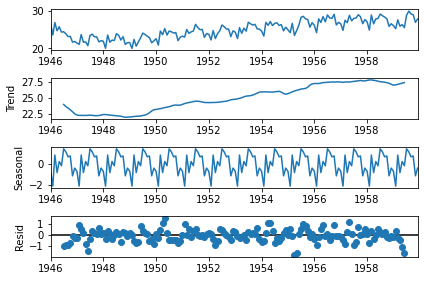

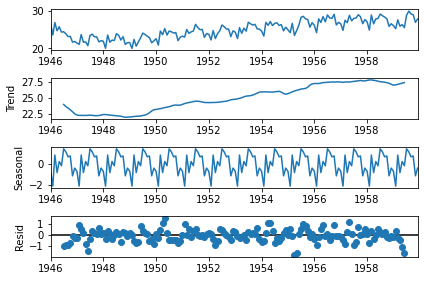

In [24]:
births_dec_a.plot() #Trend & Seasonality visible


In [25]:
births_dec_a.observed
births_dec_a.trend.head(20) #First 6 and last 6 values are Na's due calculation of seasonality indices of 12 months


month_year
1946-01-01          NaN
1946-02-01          NaN
1946-03-01          NaN
1946-04-01          NaN
1946-05-01          NaN
1946-06-01          NaN
1946-07-01    23.984333
1946-08-01    23.662125
1946-09-01    23.423333
1946-10-01    23.161125
1946-11-01    22.864250
1946-12-01    22.545208
1947-01-01    22.353500
1947-02-01    22.308708
1947-03-01    22.302583
1947-04-01    22.294792
1947-05-01    22.293542
1947-06-01    22.305625
1947-07-01    22.334833
1947-08-01    22.311667
Name: trend, dtype: float64

In [26]:
births_dec_a.seasonal
births_dec_a.resid.head(20) #First 6 and last 6 values are Na's due calculation of seasonality indices of 12 months
 

month_year
1946-01-01         NaN
1946-02-01         NaN
1946-03-01         NaN
1946-04-01         NaN
1946-05-01         NaN
1946-06-01         NaN
1946-07-01   -0.963379
1946-08-01   -0.925719
1946-09-01   -0.939950
1946-10-01   -0.709369
1946-11-01   -0.082485
1946-12-01   -0.298389
1947-01-01   -0.237305
1947-02-01    0.863252
1947-03-01    0.543893
1947-04-01    0.175887
1947-05-01   -0.793193
1947-06-01   -1.391369
1947-07-01   -0.311879
1947-08-01    0.347740
Name: resid, dtype: float64

In [27]:
'''
SimpleExpSmoothing is used when there is no trend and Seasonal
Holt is used when there is trend
ExponentialSmoothing is when there trend and seasonal'''

'\nSimpleExpSmoothing is used when there is no trend and Seasonal\nHolt is used when there is trend\nExponentialSmoothing is when there trend and seasonal'

In [28]:
#For this data supposed to use last method but trying other methods for practice

#_______________$$$$$$$$
#Model with single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
births_ses = SimpleExpSmoothing(births).fit()
births_ses.summary()

C:\Program Files\ancondapython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Program Files\ancondapython\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Dep. Variable:,births,No. Observations:,168
Model:,SimpleExpSmoothing,SSE,280.315
Optimized:,True,AIC,90.007
Trend:,None,BIC,96.255
Seasonal:,None,AICC,90.253
Seasonal Periods:,None,Date:,"Sun, 05 Sep 2021"
Box-Cox:,False,Time:,12:12:03
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4379774,alpha,True
initial_level,25.611517,l.0,True


In [29]:
#forecasting/ predicting next 19 periods
births_pred = births_ses.forecast(steps=19)
print(births_pred)


1960-01-01    27.991391
1960-02-01    27.991391
1960-03-01    27.991391
1960-04-01    27.991391
1960-05-01    27.991391
1960-06-01    27.991391
1960-07-01    27.991391
1960-08-01    27.991391
1960-09-01    27.991391
1960-10-01    27.991391
1960-11-01    27.991391
1960-12-01    27.991391
1961-01-01    27.991391
1961-02-01    27.991391
1961-03-01    27.991391
1961-04-01    27.991391
1961-05-01    27.991391
1961-06-01    27.991391
1961-07-01    27.991391
Freq: MS, dtype: float64


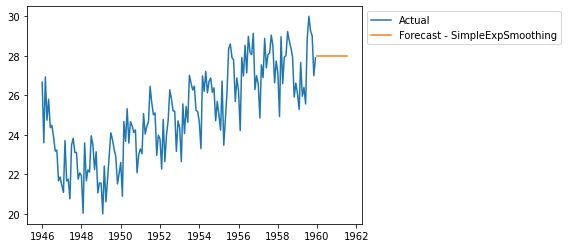

In [30]:
#Plot actual and forecast
plt.plot(births)
plt.plot(births_pred)
plt.legend(['Actual', 'Forecast - SimpleExpSmoothing'],
           bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [31]:
#Model with double exponential smoothing
from statsmodels.tsa.holtwinters import Holt
births_holt = Holt(births).fit()
births_holt.summary()

C:\Program Files\ancondapython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Dep. Variable:,births,No. Observations:,168
Model:,Holt,SSE,280.134
Optimized:,True,AIC,93.899
Trend:,Additive,BIC,106.395
Seasonal:,None,AICC,94.421
Seasonal Periods:,None,Date:,"Sun, 05 Sep 2021"
Box-Cox:,False,Time:,12:12:03
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4354823,alpha,True
smoothing_trend,0.000000,beta,True


In [32]:
#forecasting/ predicting
births_pred1 = births_holt.forecast(steps=19)
print(births_pred1)


1960-01-01    28.026265
1960-02-01    28.040764
1960-03-01    28.055262
1960-04-01    28.069761
1960-05-01    28.084260
1960-06-01    28.098759
1960-07-01    28.113258
1960-08-01    28.127757
1960-09-01    28.142255
1960-10-01    28.156754
1960-11-01    28.171253
1960-12-01    28.185752
1961-01-01    28.200251
1961-02-01    28.214750
1961-03-01    28.229248
1961-04-01    28.243747
1961-05-01    28.258246
1961-06-01    28.272745
1961-07-01    28.287244
Freq: MS, dtype: float64


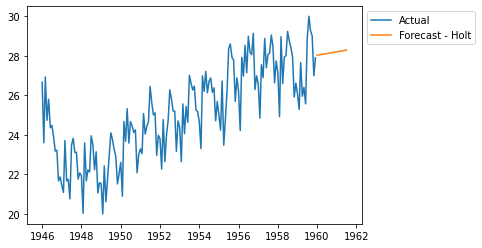

In [33]:
#Plot actual and forecast
plt.plot(births)
plt.plot(births_pred1)
plt.legend(['Actual', 'Forecast - Holt'], bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [34]:
#______________$$$$$$$$$$$$$$$$$$$$$$$$$$$

#Model with triple exponential smoothing
# applicable when trend and seasonality exists
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [35]:
births_es = ExponentialSmoothing(births, seasonal_periods=12,
                                 trend='add', seasonal='add').fit()
births_es.summary()


C:\Program Files\ancondapython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Dep. Variable:,births,No. Observations:,168
Model:,ExponentialSmoothing,SSE,63.346
Optimized:,True,AIC,-131.859
Trend:,Additive,BIC,-81.875
Seasonal:,Additive,AICC,-127.268
Seasonal Periods:,12,Date:,"Sun, 05 Sep 2021"
Box-Cox:,False,Time:,12:12:04
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9401516,alpha,True
smoothing_trend,0.000000,beta,True


In [36]:
#Residual given by the model
births_es_res = births_es.resid
births_es_res


month_year
1946-01-01    0.092985
1946-02-01   -1.566373
1946-03-01    0.229823
1946-04-01   -0.510768
1946-05-01   -0.051871
                ...   
1959-08-01    1.421315
1959-09-01   -0.169169
1959-10-01   -0.324778
1959-11-01   -0.150182
1959-12-01    0.145448
Length: 168, dtype: float64

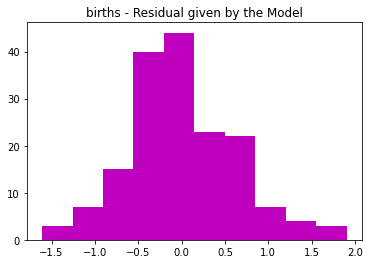

In [37]:
#Histogram of residuals
plt.hist(births_es_res, color = 'm')
plt.title('births - Residual given by the Model')
plt.show()

In [38]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf 


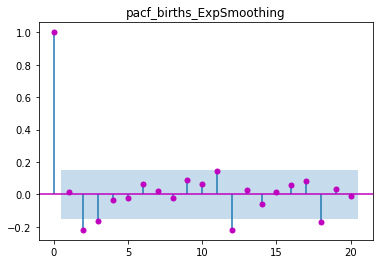

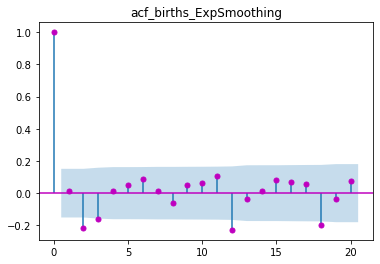

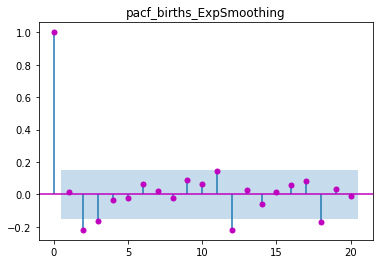

In [39]:
plot_acf(births_es_res, lags=20, color = 'm',
          title = 'acf_births_ExpSmoothing')

plot_pacf(births_es_res, lags=20, color = 'm',
          title = 'pacf_births_ExpSmoothing')

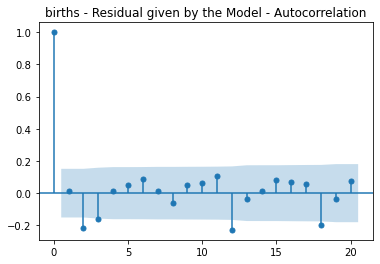

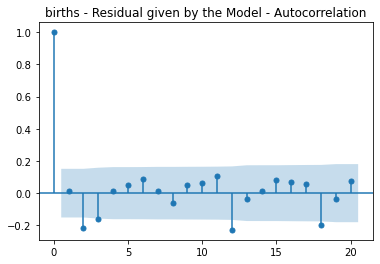

In [40]:
plot_acf(births_es_res, lags=20,
   title='births - Residual given by the Model - Autocorrelation')

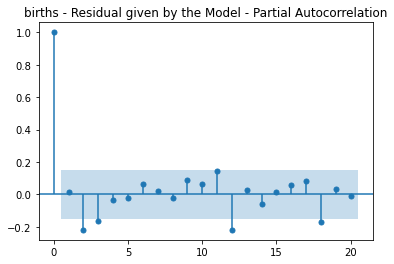

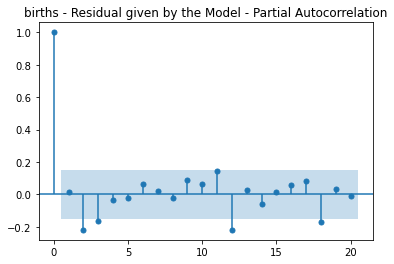

In [41]:
plot_pacf(births_es_res, lags=20,
   title='births - Residual given by the Model - Partial Autocorrelation')

In [42]:
#________________________________________leave above
#Squaring residuals/ errors
births_es_se = pow(births_es_res,2)
births_es_se.head()

month_year
1946-01-01    0.008646
1946-02-01    2.453525
1946-03-01    0.052819
1946-04-01    0.260884
1946-05-01    0.002691
dtype: float64

In [43]:
#average/mean of squared residuals/ errors
births_es_mse = (births_es_se.sum())/len(births_es_se)
print(births_es_mse) #0.3770609200564516


0.37706092002360475


In [44]:
#Root of average/mean of squared residuals/ errors
births_es_rmse = sqrt(births_es_mse)
print(births_es_rmse) #0.6140528642197279


0.614052864192982


In [45]:
#forecasting/ predicting
births_pred2 = births_es.forecast(steps=19)
print(births_pred2)

1960-01-01    27.612333
1960-02-01    26.119271
1960-03-01    29.128703
1960-04-01    27.462226
1960-05-01    28.549528
1960-06-01    28.104346
1960-07-01    29.707011
1960-08-01    29.520752
1960-09-01    29.035984
1960-10-01    29.101638
1960-11-01    27.212382
1960-12-01    27.962947
1961-01-01    27.686984
1961-02-01    26.193923
1961-03-01    29.203355
1961-04-01    27.536877
1961-05-01    28.624180
1961-06-01    28.178998
1961-07-01    29.781663
Freq: MS, dtype: float64


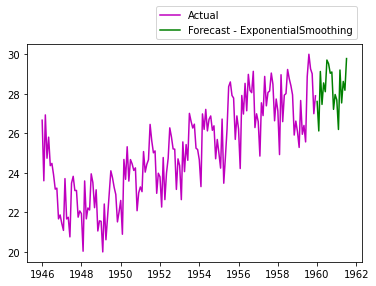

In [46]:
#Plot actual and forecast
plt.plot(births, color = 'm')
plt.plot(births_pred2, color = 'g')
plt.legend(['Actual', 'Forecast - ExponentialSmoothing'], 
           bbox_to_anchor=(1, 1), loc=4)
plt.show()

In [47]:
#____________________________let's go for autoarima
#Test for stationarity
from statsmodels.tsa.stattools import adfuller
births_adf = adfuller(births)
births_adf


(-0.3312806303805187,
 0.9209557340544081,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 385.9083089080857)

In [48]:
print('ADF Statistic: %f' % births_adf[0])
print('p-value: %f' % births_adf[1])
print('Critical Values:')
for key, value in births_adf[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.331281
p-value: 0.920956
Critical Values:
	1%: -3.474
	5%: -2.880
	10%: -2.577


In [49]:
#p-value: 0.920956 ie > 0.05, Null Hypothesis accepted and the data is not stationary    
#H0: Data is not stationary

In [50]:
'''When data is not stationary, apply differencing and check for stationarity'''


'When data is not stationary, apply differencing and check for stationarity'

In [51]:
#Differencing @1
births1 = births.diff() #default 1
births1.head()
births1 = births.dropna()
births1.head()

,births
month_year,
1946-01-01,26.663
1946-02-01,23.598
1946-03-01,26.931
1946-04-01,24.740
1946-05-01,25.806


In [52]:
#Test for stationarity
from statsmodels.tsa.stattools import adfuller
births1_adf = adfuller(births1)


In [53]:
print('ADF Statistic: %f' % births1_adf[0])
print('p-value: %f' % births1_adf[1])
print('Critical Values:')
for key, value in births1_adf[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.331281
p-value: 0.920956
Critical Values:
	1%: -3.474
	5%: -2.880
	10%: -2.577


In [54]:
#p-value: 0.920956 ie > 0.05, Null Hypothesis accepted and the data is not stationary    
#H0: Data is not stationary


In [55]:
#________________________________Applying auto - arima to forecast
#!pip install pmdarima

In [56]:
!pip install --user pmdarima

In [57]:
from pmdarima import auto_arima

births_mod = auto_arima(births)
births_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  168
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -271.935
Date:                Sun, 05 Sep 2021   AIC                            551.870
Time:                        12:12:21   BIC                            564.342
Sample:                             0   HQIC                           556.932
                                - 168                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2509      0.095      2.643      0.008       0.065       0.437
ar.L2          0.3441      0.116      2.977      0.003       0.118       0.571
ma.L1         -0.9143      0.065    -14.166      0.000      -1.041      -0.788
sigma2         1.5133      0.194      7.788      0.000       1.132       1.894
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                 2.24
Prob(Q):                              0.66   Prob(JB):                         0.33
Heteroskedasticity (H):               1.22   Skew:                             0.14
Prob(H) (two-sided):                  0.46   Kurtosis:                         2.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
#Residual given by the model
births_mod_res = births_mod.resid()
births_mod_res

array([ 2.66630000e+01, -3.06496707e+00,  1.67623141e+00, -5.38890836e-01,
        1.51614119e-03, -9.54344881e-01, -7.35585839e-01, -7.62660474e-01,
       -1.30227937e+00, -7.36779100e-01, -1.98186280e+00, -1.21938524e+00,
       -1.04919592e+00, -1.26113424e+00,  1.71116739e+00, -1.02168046e+00,
       -1.23607846e+00, -1.43550271e+00,  1.63010261e+00,  1.49007196e+00,
       -3.81586639e-01, -2.81462737e-01, -1.36178929e+00, -5.92037136e-01,
       -2.90636461e-01, -2.24137169e+00,  2.03151129e+00, -2.99604638e-01,
       -4.65582078e-01, -2.58136740e-03,  1.66025232e+00,  6.46997802e-01,
       -1.19131005e+00,  2.86225347e-01, -1.61264090e+00, -7.48449972e-01,
       -1.21497508e-01, -1.82963999e+00,  1.14845475e+00, -8.34783005e-01,
        2.80286171e-03,  1.45038240e+00,  1.88237147e+00,  6.73308686e-01,
       -2.04298154e-01, -2.97332841e-01, -1.40353535e+00, -3.06717533e-01,
        6.49161155e-01, -1.43589754e+00,  2.70013926e+00,  1.10361768e+00,
        1.60635715e+00, -

In [59]:
#Adding index and converting to datframe
births_mod_res1 = pd.DataFrame(births_mod_res, index=births.index)
births_mod_res1

,0
month_year,
1946-01-01,26.663000
1946-02-01,-3.064967
1946-03-01,1.676231
1946-04-01,-0.538891
1946-05-01,0.001516
...,...
1959-08-01,2.928724
1959-09-01,0.518391
1959-10-01,0.019883


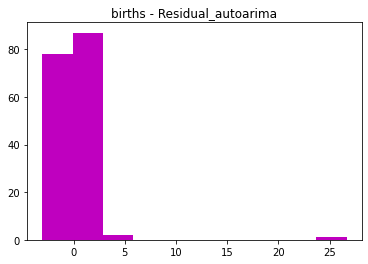

In [60]:
#Histogram of residuals
plt.hist(births_mod_res1, color = 'm')
plt.title('births - Residual_autoarima')
plt.show()

In [61]:
#__________________________________rmse
#Squaring residuals/ errors
births_mod_se = pow(births_mod_res1,2)
births_mod_se.head()

,0
month_year,
1946-01-01,710.915569
1946-02-01,9.394023
1946-03-01,2.809752
1946-04-01,0.290403
1946-05-01,0.000002


In [62]:
#average/mean of squared residuals/ errors
births_mod_mse = (births_mod_se.sum())/len(births_mod_se)
print(births_mod_mse) #5.757373

0    5.757372
dtype: float64


In [63]:
#Root of average/mean of squared residuals/ errors
births_mod_rmse = sqrt(births_mod_mse)
print(births_mod_rmse) #2.399452542080286

2.399452541417441


In [64]:
#Plotting acf & pacf - residual
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


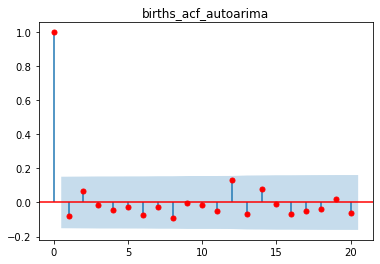

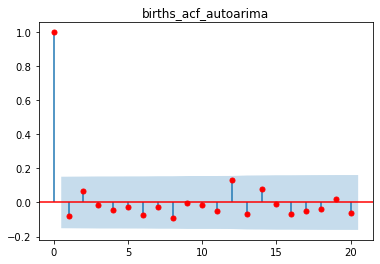

In [65]:
plot_acf(births_mod_res1, lags=20, color ='r', 
         title='births_acf_autoarima') 


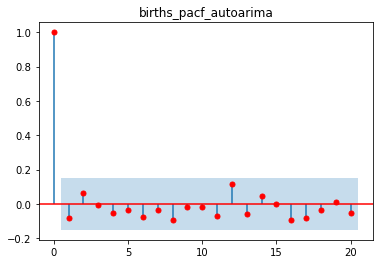

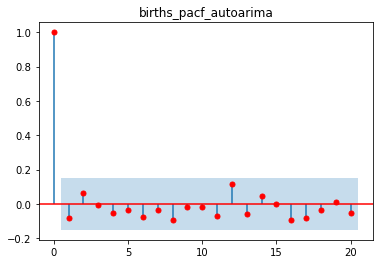

In [66]:
plot_pacf(births_mod_res1, lags=20, color = 'r',
          title='births_pacf_autoarima')


In [67]:
#Forecasting next 19 periods
births_mod_pred = births_mod.predict(n_periods=19)
births_mod_pred

array([27.46843451, 27.67226141, 27.575959  , 27.62192084, 27.60032104,
       27.61071425, 27.60589078, 27.60825623, 27.60719026, 27.60773662,
       27.60750697, 27.60763732, 27.60759102, 27.60762425, 27.60761665,
       27.60762618, 27.60762596, 27.60762918, 27.60762991])

In [68]:
#Adding index to forecast and converting to dataframe

births_mod_pred = pd.DataFrame(births_mod_pred, 
                               index=pd.date_range(start='1960-01-01', 
                                                   periods=19, freq='MS'))
births_mod_pred

,0
1960-01-01,27.468435
1960-02-01,27.672261
1960-03-01,27.575959
1960-04-01,27.621921
1960-05-01,27.600321
1960-06-01,27.610714
1960-07-01,27.605891
1960-08-01,27.608256
1960-09-01,27.607190
1960-10-01,27.607737


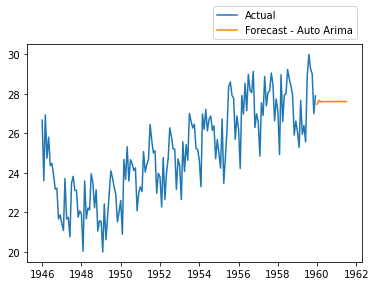

In [69]:
#Plot actual and forecast
plt.plot(births)
plt.plot(births_mod_pred)
plt.legend(['Actual', 'Forecast - Auto Arima'], 
           bbox_to_anchor=(1, 1), loc=4)
plt.show()
